In [2]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
from prettytable import PrettyTable 
from matplotlib.pyplot import figure

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_results = '/content/drive/MyDrive/PIBIC/results/'

## **Box plots**

In [7]:
def box(data_name):
    x = 'Optimizer'
    y = 'F1'
    #figure(figsize=(5, 5), dpi=400)
    data = pd.read_csv(path_results + 'general_cv_mean(' + data_name +').csv')
    sns.set_theme(style='whitegrid')
    sns_box = sns.boxplot(x=x, y=y, data=data, saturation=100, width=0.9)
    plt.show()

origin


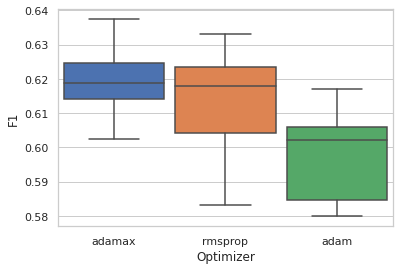

tomek


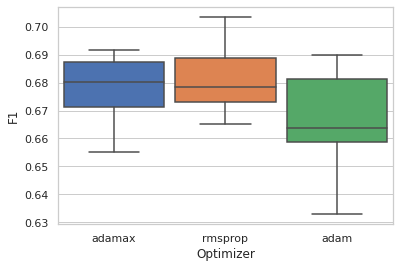

adasyn


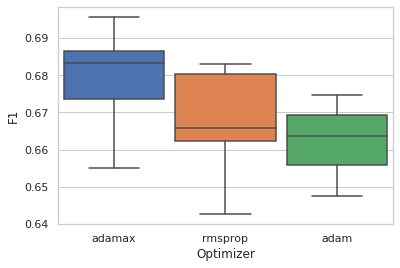

smote


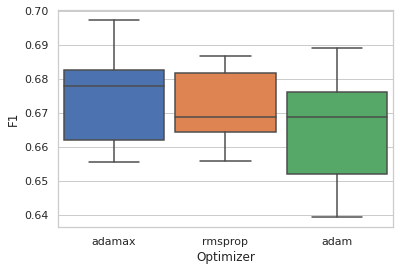

bdsmote


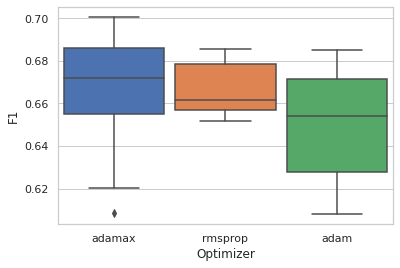

smotetomek


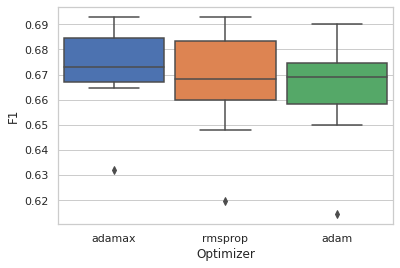

In [8]:
names = ['origin', 'tomek', 'adasyn', 'smote', 'bdsmote', 'smotetomek']

if __name__ == '__main__':
    for n in names:
      print(n)
      box(n)

## **Table**

In [9]:
def csv_to_dict(filename, metric):
  data = pd.read_csv(filename+'.csv')

  adamax = round(data.loc[(data['Optimizer']=='adamax')][metric].values.tolist()[0],2)
  rmsprop = round(data.loc[(data['Optimizer']=='rmsprop')][metric].values.tolist()[0],2)
  adam = round(data.loc[(data['Optimizer']=='adam')][metric].values.tolist()[0],2)
                
  return {'adamax':adamax, 'rmsprop':rmsprop, 'adam':adam}

In [10]:
metrics = ['F1', 'Precision', 'Recall', 'AUC', 'Kappa']

for metric in metrics:
  print(metric)
  origin_dict = csv_to_dict(path_results+'final_mean(origin)', metric)
  tomek_dict = csv_to_dict(path_results+'final_mean(tomek)', metric)
  adasyn_dict = csv_to_dict(path_results+'final_mean(adasyn)', metric)
  bdsmote_dict = csv_to_dict(path_results+'final_mean(bdsmote)', metric)
  smote_dict = csv_to_dict(path_results+'final_mean(smote)', metric)
  smotetomek_dict = csv_to_dict(path_results+'final_mean(smotetomek)', metric)
  
  # Specify the Column Names while initializing the Table 
  myTable = PrettyTable(['Otimizador', 'Original', 'Tomek Links', 'ADASYN', 'BD-SMOTE', 'SMOTE', 'SMOTE-TL']) 

  # Add rows 
  myTable.add_row(['adam', origin_dict['adam'], tomek_dict['adam'], adasyn_dict['adam'], bdsmote_dict['adam'], smote_dict['adam'], smotetomek_dict['adam']]) 
  myTable.add_row(['adamax', origin_dict['adamax'], tomek_dict['adamax'], adasyn_dict['adamax'], bdsmote_dict['adamax'], smote_dict['adamax'], smotetomek_dict['adamax']]) 
  myTable.add_row(['rmsprop', origin_dict['rmsprop'], tomek_dict['rmsprop'], adasyn_dict['rmsprop'], bdsmote_dict['rmsprop'], smote_dict['rmsprop'], smotetomek_dict['rmsprop']]) 

  print(myTable)

F1
+------------+----------+-------------+--------+----------+-------+----------+
| Otimizador | Original | Tomek Links | ADASYN | BD-SMOTE | SMOTE | SMOTE-TL |
+------------+----------+-------------+--------+----------+-------+----------+
|    adam    |   0.6    |     0.67    |  0.66  |   0.65   |  0.66 |   0.66   |
|   adamax   |   0.62   |     0.68    |  0.68  |   0.66   |  0.68 |   0.67   |
|  rmsprop   |   0.61   |     0.68    |  0.67  |   0.67   |  0.67 |   0.67   |
+------------+----------+-------------+--------+----------+-------+----------+
Precision
+------------+----------+-------------+--------+----------+-------+----------+
| Otimizador | Original | Tomek Links | ADASYN | BD-SMOTE | SMOTE | SMOTE-TL |
+------------+----------+-------------+--------+----------+-------+----------+
|    adam    |   0.66   |     0.72    |  0.71  |   0.69   |  0.71 |   0.71   |
|   adamax   |   0.68   |     0.73    |  0.73  |   0.72   |  0.73 |   0.72   |
|  rmsprop   |   0.68   |     0.74    |

In [11]:
def get_value(filename, metric, opt):
  data = pd.read_csv(filename+'.csv')

  result = data.loc[(data['Optimizer']==opt)][metric].values.tolist()[0]
                
  return result

In [12]:
def max_val(arr):
    max_value = None
    max_idx = None

    for idx, num in enumerate(arr):
        if (max_value is None or num > max_value):
            max_value = num
            max_idx = idx

    return max_value, max_idx

In [13]:
import operator
def get_best(metric, opt):
  names = ['origin', 'tomek', 'adasyn', 'smote', 'bdsmote', 'smotetomek']
  values = []
  
  values.append(get_value(path_results+'final_mean(origin)', metric, opt))
  values.append(get_value(path_results+'final_mean(tomek)', metric, opt))
  values.append(get_value(path_results+'final_mean(adasyn)', metric, opt))
  values.append(get_value(path_results+'final_mean(bdsmote)', metric, opt))
  values.append(get_value(path_results+'final_mean(smote)', metric, opt))
  values.append(get_value(path_results+'final_mean(smotetomek)', metric, opt))

  max, index = max_val(values)

  return round(max,2), names[index]

In [17]:
origin_dict = csv_to_dict(path_results+'final_mean(origin)', 'F1')

f1_adam, res_adam = get_best('F1', 'adam')
f1_adam_origin = origin_dict['adam']

f1_adamax, res_adamax = get_best('F1', 'adamax')
f1_adamax_origin = origin_dict['adamax']

f1_rmsprop, res_rmsprop = get_best('F1', 'rmsprop')
f1_rmsprop_origin = origin_dict['rmsprop']

# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['Otimizador', 'Reamostragem', 'F1', 'Sem reamostragem', 'Melhora (%)']) 

# Add rows 
melhora_adam = round((f1_adam-f1_adam_origin)*100,2)
melhora_adamax = round((f1_adamax-f1_adamax_origin)*100,2)
melhora_rmsprop =  round((f1_rmsprop-f1_rmsprop_origin)*100,2)

myTable.add_row(['adam', res_adam, f1_adam, f1_adam_origin, melhora_adam]) 
myTable.add_row(['adamax', res_adamax, f1_adamax, f1_adamax_origin, melhora_adamax]) 
myTable.add_row(['rmsprop', res_rmsprop, f1_rmsprop,f1_rmsprop_origin, melhora_rmsprop]) 

print(myTable)

+------------+--------------+------+------------------+-------------+
| Otimizador | Reamostragem |  F1  | Sem reamostragem | Melhora (%) |
+------------+--------------+------+------------------+-------------+
|    adam    |    tomek     | 0.67 |       0.6        |     7.0     |
|   adamax   |    adasyn    | 0.68 |       0.62       |     6.0     |
|  rmsprop   |    tomek     | 0.68 |       0.61       |     7.0     |
+------------+--------------+------+------------------+-------------+
